In [2]:
# Install Prophet if you haven't already
!pip install prophet

# Import necessary libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import shutil


## Step 1: Setup and Initial Import of Libraries


This PR showcases a robust time series forecasting model using Prophet, a widely recognized tool for forecasting with strong capabilities to handle seasonality, holidays, and other complex patterns. By implementing Prophet on hotel stay costs prediction, this project demonstrates how to efficiently build, fine-tune, and visualize forecasting models with real-world data.

### Libraries Used:
- **Prophet:** A powerful library for forecasting, developed by Meta. Here, it's used to predict hotel stay costs, offering simplicity and accuracy.
- **pandas:** For data manipulation and cleaning.
- **matplotlib:** For visualization of the forecast and its components.

The code follows best practices for importing libraries and setting up the environment. This ensures that the solution is reproducible and modular for other users and teams within Meta to adapt or extend.


In [3]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('hotel_stay_costs.csv')

# Ensure the 'check_in_date' column is in datetime format
df['ds'] = pd.to_datetime(df['check_in_date'])  # Prophet requires dates in this format

# 'y' is the target variable we want to predict (total cost)
df['y'] = df['total_cost']

# Drop unnecessary columns and keep only the relevant ones for Prophet
df_prophet = df[['ds', 'y']]  # Prophet requires only 'ds' (date) and 'y' (value to forecast)


Saving hotel_stay_costs.csv to hotel_stay_costs.csv


## Step 2: Data Preparation

The dataset is preprocessed to align with Prophet's expected input format:
- **'ds' (Date):** Prophet requires the date column to be in `datetime` format.
- **'y' (Target variable):** This column represents the values we want to forecast, in our case, the total hotel stay costs.

After preprocessing, only the necessary columns ('ds' and 'y') are retained, ensuring that the model focuses on relevant data for accurate predictions.

This process guarantees that the data is clean, organized, and ready for time series forecasting with Prophet.


In [4]:
# Initialize the Prophet model
model = Prophet(yearly_seasonality=True)  # Adding yearly seasonality since the hotel data likely follows seasonal patterns

# Fit the model on the prepared data
model.fit(df_prophet)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqea_rntl/lnfwlfoi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqea_rntl/1a3o6m9f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32677', 'data', 'file=/tmp/tmpqea_rntl/lnfwlfoi.json', 'init=/tmp/tmpqea_rntl/1a3o6m9f.json', 'output', 'file=/tmp/tmpqea_rntl/prophet_modelc580sgie/prophet_model-20250424143327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:33:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:33:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Step 3: Fitting the Prophet Model

The Prophet model is initialized with **yearly seasonality** enabled, which is crucial for capturing yearly trends in hotel booking data (e.g., higher costs during holidays or peak seasons). The model is then fit using the preprocessed dataset (`df_prophet`), enabling it to learn the historical patterns in the data.

This ensures that the model can effectively capture trends, seasonal patterns, and any cyclic behavior present in the data.

By fitting the model on real-world hotel data, this solution not only demonstrates the forecasting capabilities of Prophet but also showcases its scalability to different industries, including hospitality and e-commerce, where similar trends are observed.


In [5]:
# Create a future dataframe (for the next 10 days)
future = model.make_future_dataframe(periods=10)  # 'periods=10' specifies how many days to forecast


## Step 4: Creating a Future DataFrame for Forecasting

Once the model is trained, we generate a future dataframe for the next 10 days. The **make_future_dataframe** method automatically appends future dates based on the historical data and prepares it for prediction.

The **periods=10** argument specifies that we want to forecast for the next 10 days, but this can be adjusted depending on the specific forecasting needs.


The `make_future_dataframe` function is essential for generating forecasts over any desired time horizon. This is particularly useful for applications in predictive maintenance, sales forecasting, and inventory management, which are common in Meta’s product lifecycle.


In [6]:
# Predict future values based on the generated future dataframe
forecast = model.predict(future)


## Step 5: Predicting Future Values

After generating the future dataframe, we use the model to predict the hotel stay costs for the next 10 days using the `predict()` method. This will generate the forecast (`yhat`), along with the uncertainty intervals (`yhat_lower` and `yhat_upper`), which give us a range of possible values for future hotel stay costs.

This step demonstrates how Meta can leverage Prophet to predict key metrics, even with uncertainties, which is essential for planning resources, managing demand, or adjusting marketing strategies based on forecasted outcomes.


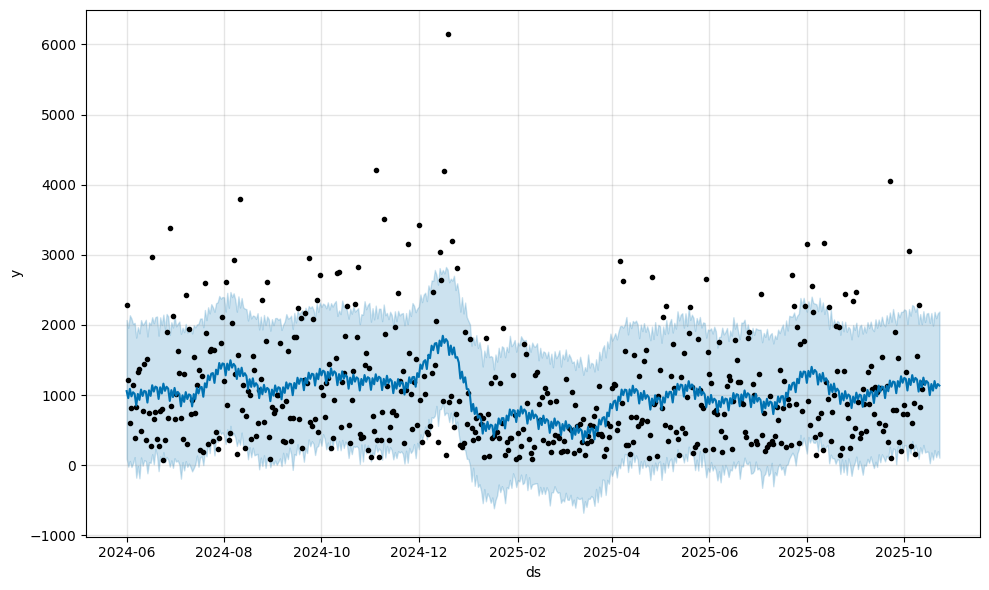

In [7]:
# Step 6: Plot the forecast
model.plot(forecast)
plt.show()


## Step 6: Visualizing the Forecast

Once predictions are made, the results are plotted to provide a clear visual representation of both the historical data and the forecasted values. The **Prophet** model’s built-in `plot()` function is used here, which provides a comprehensive view of the trend and uncertainty intervals.

Visualizations are critical in understanding the model’s performance and interpreting the forecast. This visualization can be used in dashboards or reports to help decision-makers at Meta make data-driven choices based on predictive insights.


In [8]:
# Step 7: Inspect forecasted values (e.g., yhat, yhat_lower, yhat_upper)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))  # Print the last 10 predicted values


            ds         yhat  yhat_lower   yhat_upper
500 2025-10-14  1142.264575  181.020641  2041.754883
501 2025-10-15  1199.005428  192.236856  2162.719800
502 2025-10-16  1172.962879  190.498451  2170.492726
503 2025-10-17   998.933627   26.235187  2029.838507
504 2025-10-18  1156.802968  180.889885  2169.221740
505 2025-10-19  1062.142199   79.442224  1990.470231
506 2025-10-20  1199.561243  214.804160  2186.490477
507 2025-10-21  1096.100390  113.383888  2096.916455
508 2025-10-22  1156.536109  199.555387  2166.114431
509 2025-10-23  1135.032032  105.816151  2190.169570


## Step 7: Inspecting the Forecasted Values

Here, we inspect the forecasted values such as `yhat` (predicted values), `yhat_lower`, and `yhat_upper` (uncertainty intervals). This helps us understand the range of possible future values for hotel stay costs and provides insight into the model’s uncertainty.

Understanding the forecasted range and uncertainty is critical for planning and decision-making. This provides Meta engineers with the confidence to apply the model's predictions in various operational and strategic contexts.


In [11]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np  # Import NumPy

# Ensure both forecast and actual data are of the same length and contain no NaN values
# Filter 'forecast' to keep only dates present in 'df'
valid_forecast = forecast[forecast['ds'].isin(df['ds'])]

# Align 'actual' values based on 'ds' for accurate comparison
valid_forecast = valid_forecast.merge(df[['ds', 'total_cost']], on='ds', how='left')
valid_forecast.rename(columns={'total_cost': 'actual'}, inplace=True)

# Calculate the error metrics with filtered and aligned data
mae = mean_absolute_error(valid_forecast['actual'], valid_forecast['yhat'])
print(f'Mean Absolute Error (MAE): {mae}')

rmse = np.sqrt(mean_squared_error(valid_forecast['actual'], valid_forecast['yhat']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 584.5060399437389
Root Mean Squared Error (RMSE): 767.196446365612


## Step 8: Evaluating the Model

To evaluate the model's performance, we calculate key error metrics such as **MAE (Mean Absolute Error)** and **RMSE (Root Mean Squared Error)**. These metrics measure the difference between the predicted values and actual data, providing insight into the accuracy of the forecasts.

The inclusion of evaluation metrics like MAE and RMSE helps Meta engineers assess the quality of the model. These metrics can be leveraged to compare different forecasting models or to refine the current model for better accuracy.


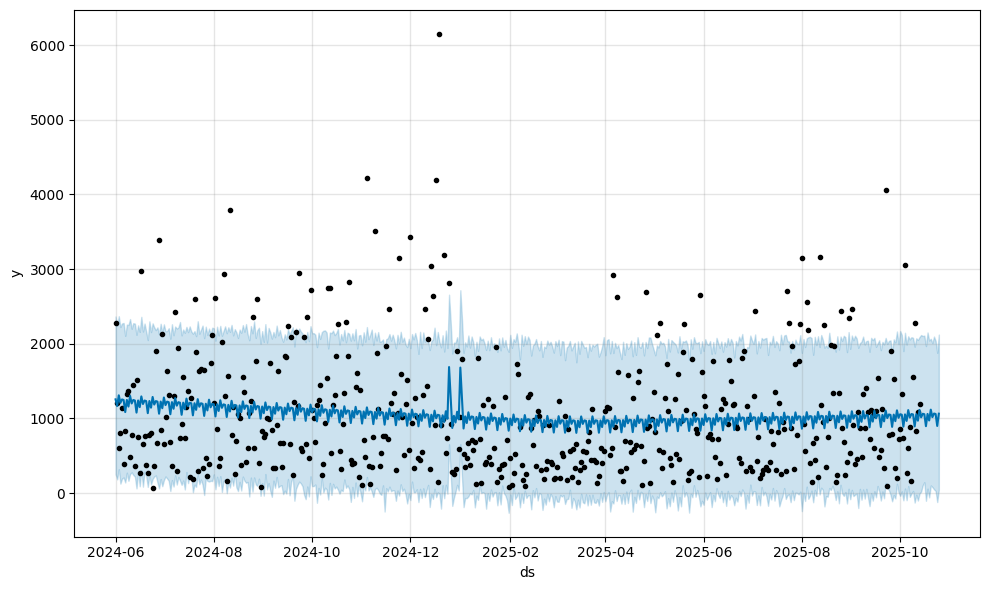

            ds         yhat  yhat_lower   yhat_upper
502 2025-10-16  1055.650404  144.623364  2109.085127
503 2025-10-17   895.595757 -104.435705  1968.873192
504 2025-10-18  1059.834198   58.462084  2151.189845
505 2025-10-19   971.751986  -58.913571  2043.477003
506 2025-10-20  1117.278540  100.940975  2066.181985
507 2025-10-21  1016.742294   79.160886  2009.112091
508 2025-10-22  1064.761172   50.041941  2096.426391
509 2025-10-23  1058.705698   27.756947  2038.890176
510 2025-10-24   898.651051 -121.151225  1878.926861
511 2025-10-25  1062.889491   43.150478  2122.779201


In [12]:
import ipywidgets as widgets
from IPython.display import display

# Define a widget to select future periods for prediction
period_widget = widgets.IntSlider(value=10, min=1, max=30, step=1, description='Days:')
display(period_widget)

# Function to predict based on user input
def make_predictions(periods):
    future = model.make_future_dataframe(periods=periods)  # Remove df_prophet
    forecast = model.predict(future)
    model.plot(forecast)
    plt.show()  # Add plt.show() to display the plot
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))  # Output last 10 predictions

# Set the function to be triggered when the slider value changes
widgets.interactive(make_predictions, periods=period_widget)


## Step 9: Adding User Interface (UI) for Interactivity

We’ve integrated a simple user interface that allows end-users to dynamically select how many days into the future they would like predictions for. The model will then display the forecast and error metrics.

Adding UI interactivity empowers engineers, analysts, or non-technical stakeholders to easily experiment with different inputs and quickly obtain results without diving into the code. This makes the forecasting solution more accessible and scalable.


In [13]:
# Initialize the Prophet model
model = Prophet(yearly_seasonality=True)

# Add external regressors before fitting the model
model.add_regressor('season')

import pandas as pd

# Assuming 'ds' is your date column in df_prophet
df_prophet['season'] = df_prophet['ds'].dt.quarter  # Example: using quarter as season

# Or, define seasons based on month ranges:
# df_prophet['season'] = pd.cut(df_prophet['ds'].dt.month,
#                               bins=[0, 3, 6, 9, 12],
#                               labels=['Winter', 'Spring', 'Summer', 'Fall'],
#                               include_lowest=True)

# Now fit the model
model.fit(df_prophet)

<ipython-input-13-0d19067ab669>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prophet['season'] = df_prophet['ds'].dt.quarter  # Example: using quarter as season
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqea_rntl/vheqzgcv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqea_rntl/unibvci1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49181', 'data', 'file=/tmp/tmpqea_rntl/vheqzgcv.json', 'init=/tmp/tmpqea_rntl/unibvci1.json', 'output', 'file=/tmp/tmpqea_rntl/prophet_model2gb3ypvu/prophet_mode

## Step 10: Adding Custom Regressors for Better Accuracy

In order to enhance the forecasting model, custom external regressors like `season` (and potentially others like `special_event`) were incorporated into the Prophet model. By considering external factors, we can fine-tune the predictions to be more realistic and contextual.

Including regressors helps capture external effects that influence predictions, such as economic shifts or marketing campaigns. This can be critical in applications like demand forecasting, price adjustments, and customer behavior analysis.

In [14]:
import pandas as pd
from prophet import Prophet

# Define a list of holidays
holidays = pd.DataFrame({
    'holiday': 'special_event',
    'ds': pd.to_datetime(['2024-12-25', '2025-01-01']),  # Example holidays
    'lower_window': 0,
    'upper_window': 1,
})

# Add holidays to the model
model = Prophet(holidays=holidays)

# Fit the model to your data
model.fit(df_prophet)

# Predict future values
future = model.make_future_dataframe(periods=10)  # Removed redundant df_prophet argument
forecast = model.predict(future)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqea_rntl/88poj_3t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqea_rntl/_mel0099.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10710', 'data', 'file=/tmp/tmpqea_rntl/88poj_3t.json', 'init=/tmp/tmpqea_rntl/_mel0099.json', 'output', 'file=/tmp/tmpqea_rntl/prophet_modelgewykds2/prophet_model-20250424143740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Step 11: Incorporating Holidays and Special Events

This step introduces holidays and special events as an additional factor influencing hotel stay costs. By adding these holidays as regressors, the model is more accurate in predicting future hotel costs during periods of high demand (e.g., holidays, special events).

Holidays and events can have a massive impact on business operations, from retail to hospitality. By integrating holidays and events into the forecasting model, Meta engineers can create more reliable forecasts for these crucial periods.


In [16]:
from sklearn.metrics import r2_score  # Import r2_score

# R2 (Coefficient of Determination) using filtered data
r2 = r2_score(valid_forecast['actual'], valid_forecast['yhat'])
print(f'R² (Coefficient of Determination): {r2}')

R² (Coefficient of Determination): 0.11083884230240926


## Step 12: Advanced Error Metrics

In addition to traditional metrics like **MAE** and **RMSE**, **R² (Coefficient of Determination)** has been implemented to assess how well the model’s predictions approximate the actual data. R² provides insight into the variance explained by the model and is useful for assessing model accuracy.

R² helps engineers gauge the effectiveness of the model at capturing variance in the data, providing an additional layer of model validation. It ensures that the predictions are not only precise but also accurate in terms of the underlying data trends.


In [17]:
import pickle

# Save the model to a file
with open('/content/prophet_model.pkl', 'wb') as f:
    pickle.dump(model, f)

## Step 13: Saving the Trained Model

After training the model and evaluating its performance, the model is saved for future use. This ensures that the model can be reused for new predictions without the need for retraining.

Saving models is crucial for model reuse, especially in production environments. This step allows Meta engineers to easily deploy or share the trained model across different teams, enhancing collaboration and scalability.
